----
# ASSIGNMENT 1
----

##### Project Overview
---

This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008 - Dec 2016.

#### The dataset contains:
---

- lsoa_code : this represents a policing area
- borough : the london borough for which the statistic is related
- major_category : the major crime category
- minor_category : the minor crime category
- value : the count of the crime for that particular borough, in that particular month
- year : the year of the summary statistic
- month : the month of the summary statistic

----
## Library
----

In [47]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from turtle import color
from logging import root

----
## Preproses Dataset
---

Membaca Data

In [2]:
# membaca data
df_london = pd.read_csv ("london_crime_by_lsoa.csv")

In [3]:
# menampilkan 5 data teratas didalam datasets
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# menampilkan 5 data terbawa didalam datasets
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Untuk mencari tau berapa banyak entri yang dimasukkan kedalam datasets

In [5]:
# menampilkan ukuran baris dan kolom pada data
df_london.shape

(13490604, 7)

Menurut hasil diatas dapat diketahui, terdapat 13.490.603 data dengan 7 kolom.

Untuk melihat informasi dasar tentang kerangka data

In [6]:
# menampilkan informasi type data setiap variabel
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Menurut hasil diatas dapat diketahui:
1. lsoa_code, borough, major_category, dan minor_category memiliki tipe data string.
2. value, year, dan month memiliki tipe data integer.

Untuk melihat list header kolom

In [7]:
df_london.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Untuk melihat daftar index

In [8]:
df_london.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

Melihat ringkasan singkat setiap kolom dalam kerangka 

In [9]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Memeriksa berapa banyak objek null yang ada di datasets

In [10]:
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Menurut hasil diatas dapat diketahui, dataset tidak memiliki objek null

Bersihkan Dataset

In [11]:
# menghapus kolom yang tidak diperlukan
kol = (['lsoa_code'])
df_london.drop(kol, axis=1, inplace=True)

# menampilkan
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Kolom lsoa_code dalam tugas ini tidak diperlukan sehingga kolom tersebut dihapus.

In [12]:
# mengapus value=0
df_london= df_london[df_london.value != 0]

# menampilkan
df_london.head()

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


Menghapus semua data yang value = 0

In [13]:
# mengubah index
df_london.reset_index(drop=True, inplace=True)
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


Mengurutkan kembali indexnya

In [14]:
# menampilkan ukuran baris dan kolom pada data
df_london.shape

(3419099, 6)

Setelah melakukan cleaning data, dapat dilihat kembali bahwa data yang sekarang adalah 3.419.098 dengan 6 kolom

----
# Visualisasi Data
---

### Area Plot
---
Area plot adalah bentuk modifikasi dari line plot, sehingga area plot juga dikenal sebagai **Multiple Stacked Line Plot**. Dengan menggunakan area plot, kita dapat membandingkan beberapa objek tertentu berdasarkan data berbasis waktu.


1. Pertanyaan : Bagaimana perkembangan tindak kriminal di 3 wilayah di London yang memiliki tindak kriminal paling besar sepanjang tahun 2008-2016 ?

In [15]:
# hapus kolom yang tidak diperlukan
kol = ["major_category","minor_category","month"]
top3_crime = df_london.drop(kol, axis=1)
# set kolom index
top3_crime = top3_crime.set_index("year").groupby("borough").sum()
top3_crime = top3_crime.sort_values(by="value", ascending=False).head(3)
# tampilkan
top3_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809


Hasil diatas merupakan 3 wilayah yang paling banyak jumlah tindak kriminalnya

In [16]:
# bersihkan data
# hapus kolom yang tidak diperlukan
# set kolom index
df_top3 = df_london.drop(kol, axis=1).set_index("borough")
df_top3 = df_top3.loc[top3_crime.index]
df_top3 = pd.pivot_table(df_top3, values="value", 
                         aggfunc=np.sum, index="year", 
                         columns="borough")
# tampilkan
df_top3

borough,Lambeth,Southwark,Westminster
year,,,
2008,31717,33470,47846
2009,31225,30623,48456
2010,31671,31320,48116
2011,33224,30723,54243
2012,33473,30737,59226
2013,31868,31128,53852
2014,31765,28912,47564
2015,33164,30260,47395
2016,34071,31636,48330


Hasil diatas merupakan jumlah tindak kriminal sepanjang tahun 2008 - 2016 di 3 wilayah

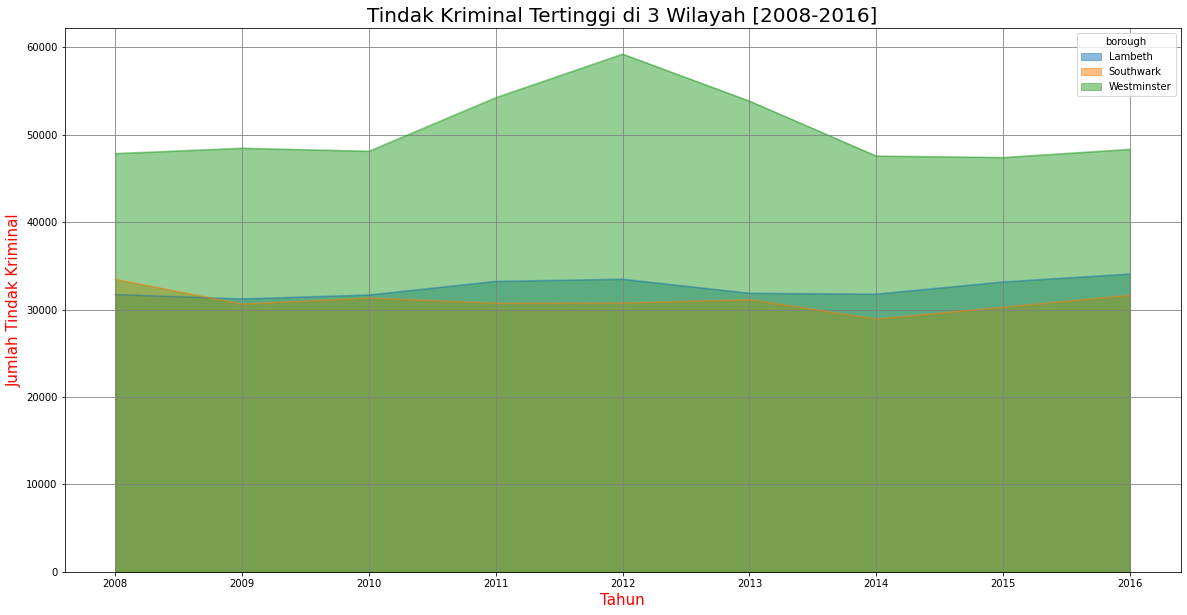

In [17]:
# insiasi area plot
df_top3.plot(kind="area",
             figsize=(20,10),
             stacked=False,
             alpha=0.5)

# membuat nama judul area plot
plt.title("Tindak Kriminal Tertinggi di 3 Wilayah [2008-2016]", fontsize=20)
# membuat nama pada xlabel
plt.xlabel("Tahun", fontsize=15, color= "red")
# membuat nama pada ylabel
plt.ylabel("Jumlah Tindak Kriminal", fontsize=15, color= "red")
# menampilkan grid
plt.grid(color = "grey")
# tampilkan area plot
plt.show()

Menurut hasil diatas, dapat diambil kesimpulan :
1. Terdapat 3 wilayah yang memiliki tindak kriminal tinggi yaitu : Westminer, Southwark, dan Lambeth
2. Dari 3 wilayah tersebut perbandingan tindak kriminal setiap tahunnya. Wilayah Westminer memiliki tindak kriminal yang cukup tinggi dari dari kedua wilayah yang lain.
3. Sedangkan 2 wilayah lain yaitu Southwark dan Lambeth memiliki perbandingan tindak kriminal yang tidak jauh berbeda setiap tahunnya. Seperti pada tahun 2009, 2010, dan 2013 hampir sama jumlah tindak kriminalnya.
4. Wilayah Westminer pada tahun 2012 memiliki jumlah tindak kriminal yang paling besar sebanyak 59.226

## Histogram
---
Histogram adalah cara untuk merepresentasikan distribusi fekuensi dari dataset numerik.

2. Pertanyaan : Bagaimana distribusi frekuensi jumlah tindak kriminal yang terjadi di wilayah  London tahun 2008-2016?

In [18]:
# hapus kolom yang tidak diperlukan
kol1 = ["major_category","minor_category","month","year"]
df_freq= df_london.drop(kol1, axis=1)
df_freq = df_freq.groupby("borough").sum()
# tampilkan
df_freq

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


Hasil diatas merupakan jumlah tindak kriminal di masing-masing wilayah London sepanjang tahun 2008-2016

In [19]:
# numpy
# membuat sumbu menjadi beberapa bin
count, bin_edges = np.histogram(df_freq)

print(count)
print(bin_edges)

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


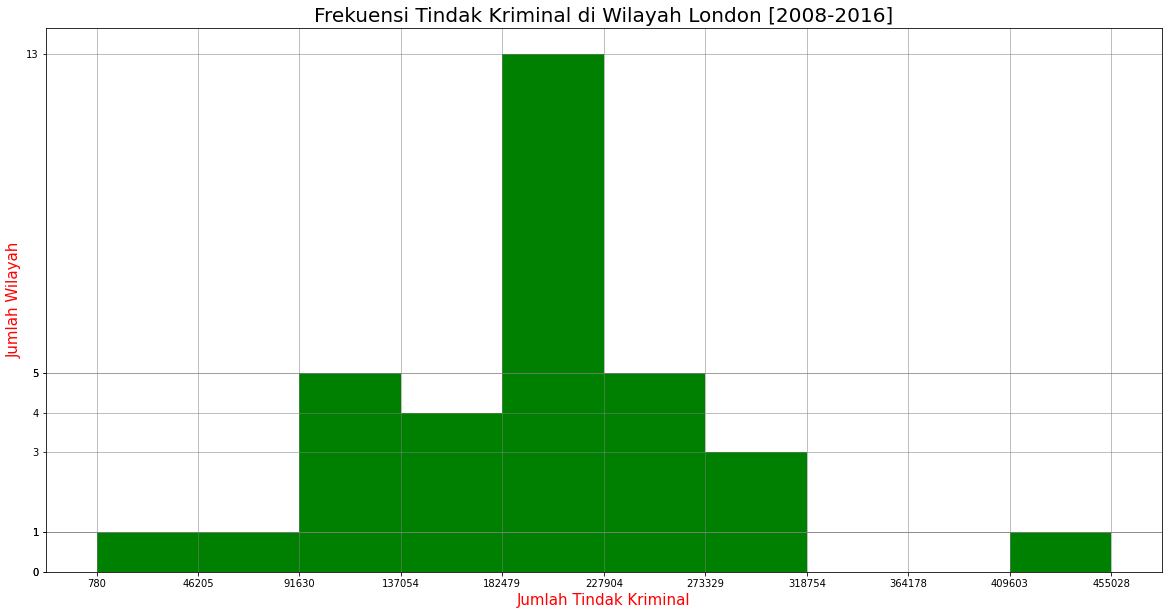

In [20]:
# inisiasi histogram
df_freq.plot(kind="hist",
             figsize=(20,10),
             xticks=bin_edges,
             yticks=count,
             legend = False,
             color="green")
# membuat nama judul histogram
plt.title("Frekuensi Tindak Kriminal di Wilayah London [2008-2016]", fontsize=20)
# membuat nama xlabel
plt.xlabel("Jumlah Tindak Kriminal", fontsize=15, color = "red")
# membuat nama ylabel
plt.ylabel("Jumlah Wilayah", fontsize=15, color = "red")
# membuat grid
plt.grid(color="grey", linewidth=0.5)
# tampilkan histogram
plt.show()

Menurut hasil diatas, dapat diambil kesimpulan :
1. Sebanyak 13 wilayah memiliki frekuensi jumlah tindak kriminal antara 182.479 - 227.904
2. 1 wilayah memiliki frekuensi jumlah tindak kriminal antara 409.603 - 455.028
3. 1 wilayah memiliki frekuensi jumlah tindak kriminal antara 780 - 46.205
4. 1 wilayah memiliki frekuensi jumlah tindak kriminal antara 46.205 - 91.630
5. Sebanyak 3 wilayah memiliki frekuensi jumlah tindak kriminal antara 273.329 - 318.754
6. Sebanyak 4 wilayah memiliki frekuensi jumlah tindak kriminal antara 137.054 - 182.479
7. Sebanyak 5 wilayah memiliki frekuensi jumlah tindak kriminal antara 91.630 - 137.054
8. Sebanyak 5 wilayah memiliki frekuensi jumlah tindak kriminal antara 227.904 - 273.329


## Bar Chart
---
Bar chart adalah cara merepresentasikan data di mana panjang batang mrepresentasikan besaran/ukuran fitur/variabel.

3. Pertanyaan : Dimana wilayah yang memiliki tindak kriminal tertinggi dan terendah sepanjang tahun 2008 - 2016 ?

In [21]:
# mengelompokkan data year, borough, value berdasarkan year dan borough
df_borough = df_london[['year', 'borough', 'value']].groupby(['year','borough']).agg({'value': 'sum'})
# menampilkan 5 data teratas
df_borough.head()

value
year borough                    
2008 Barking and Dagenham  17656
     Barnet                23944
     Bexley                15305
     Brent                 23504
     Bromley               24015

In [22]:
# set index
df_borough1 = df_borough.reset_index()[['borough', 'value']].groupby(['borough']).agg({'value': 'sum'})
# menampilkan 5 data teratas
df_borough1.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


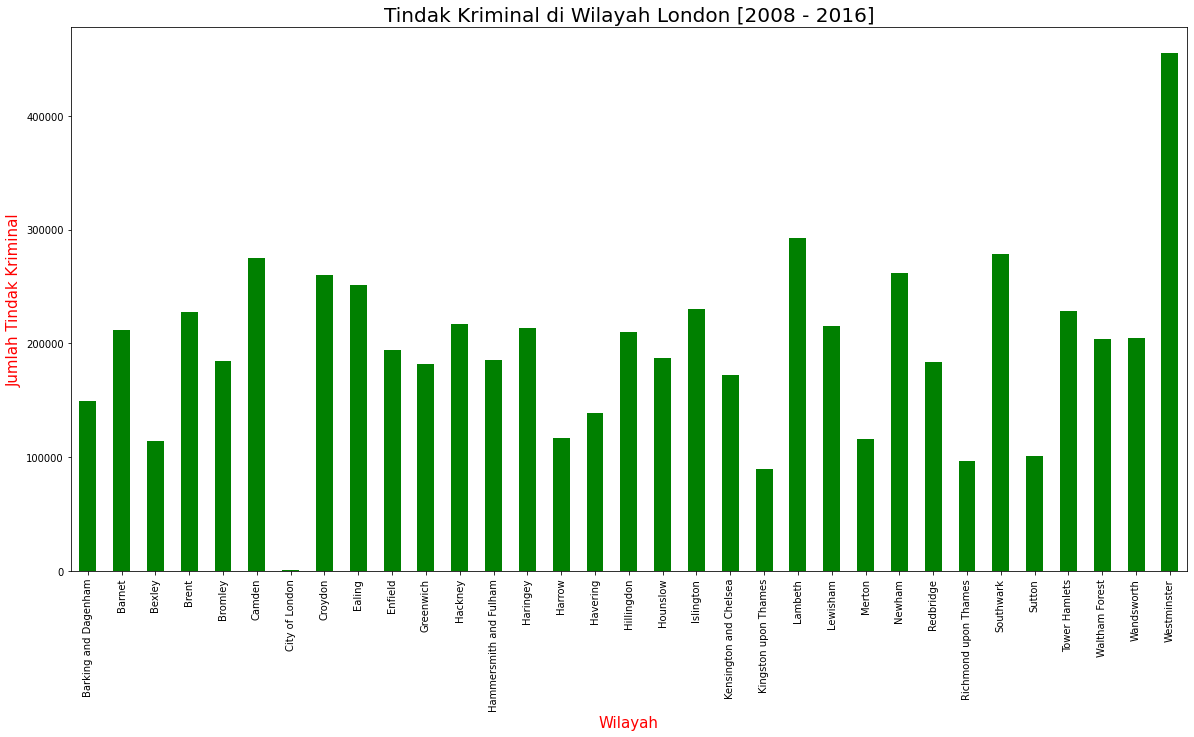

In [23]:
# inisiasi bar chart
df_borough1.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# membuat nama judul bar chart
plt.title('Tindak Kriminal di Wilayah London [2008 - 2016]', fontsize = 20)
# membuat nama xlabel
plt.xlabel('Wilayah', fontsize = 15, color = "red")
# membuat nama ylabel
plt.ylabel('Jumlah Tindak Kriminal', fontsize = 15, color = "red")

# menampilkan bar chart
plt.show()

Menurut hasil diatas, dapat diambil kesimpulan:
1. Wilayah yang memiliki tindak kriminal tertinggi yaitu Westminster
2. Wilayah yang memiliki tindak kriminal terendah yaitu City of London
3. Wilayah yang memiliki tindak kriminal kedua tertinggi yaitu Lambeth
4. Wilayah yang memiliki tindak kriminal kedua terendah yaitu Kingston upon Thames

## Pie Chart
---
Pie Chart adalah grafik circular yang menampilkan proporsi numerik dengan membagi lingkaran (atau pie) menjadi irisan proporsional.

4. Pertanyaan : Daerah mana saja yang menjadi 10 daerah dengan tindak kriminal terbanyak sepanjang tahun 2008 - 2016?

In [24]:
df_top10 = df_borough1.sort_values('value', ascending=False).head(10)
df_top10

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


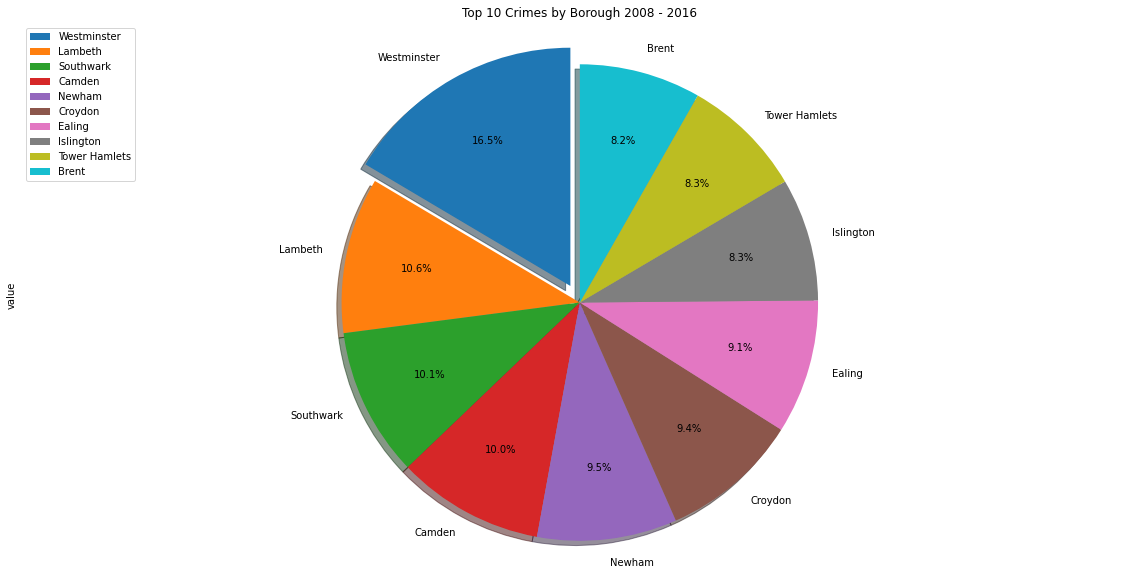

In [25]:
# inisiasi pie chart
explode_list = [.08, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df_top10.plot(
    kind="pie",
    figsize=(20,10),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True,
    explode=explode_list)

# membuat judul pie chart
plt.title('Top 10 Crimes by Borough 2008 - 2016')

plt.axis('equal')
# membuat tabel keterangan pie chart
plt.legend(labels=df_top10.index, loc='upper left')
# menampilkan pie chart
plt.show()

Menurut hasil diatas, dapat diambil kesimpulan :
1. 10 wilayah tersebut merupakan wilayah dengan tindak kriminal terbanyak sepanjang tahun 2008 - 2016. Dengan persentase sebagai berikut:
- Westminster   =  16,5%
- Lambeth       = 10,6%
- Southwark     = 10,1%
- Camden        = 10,0%
- Newham        = 9,5%
- Croydon       = 9,4%
- Ealing        = 9,1%
- Islington     = 8,3%
- Tower Hamlets = 8,3%
- Brent         = 8,2%


## Box Plot
---
Box plot adalah cara statistik untuk merepresentasikan distibusi data melalui lima dimensi utama:
- Minimum, Kuartil satu, Kuartil dua, Kuartil tiga, Maximum

5. Pertanyaan : Bagaimana distribusi statistik dari data jumlah tindak kriminal di London tahun 2008-2016?

In [26]:
# menghapus kolom yang tidak diperlukan
kol3 = ["borough","major_category","minor_category","month"]
df_total = df_london.drop(kol3, axis=1)
df_total = df_total.groupby("year").sum()
df_total

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [27]:
# menampilkan ringkasan 
df_total.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


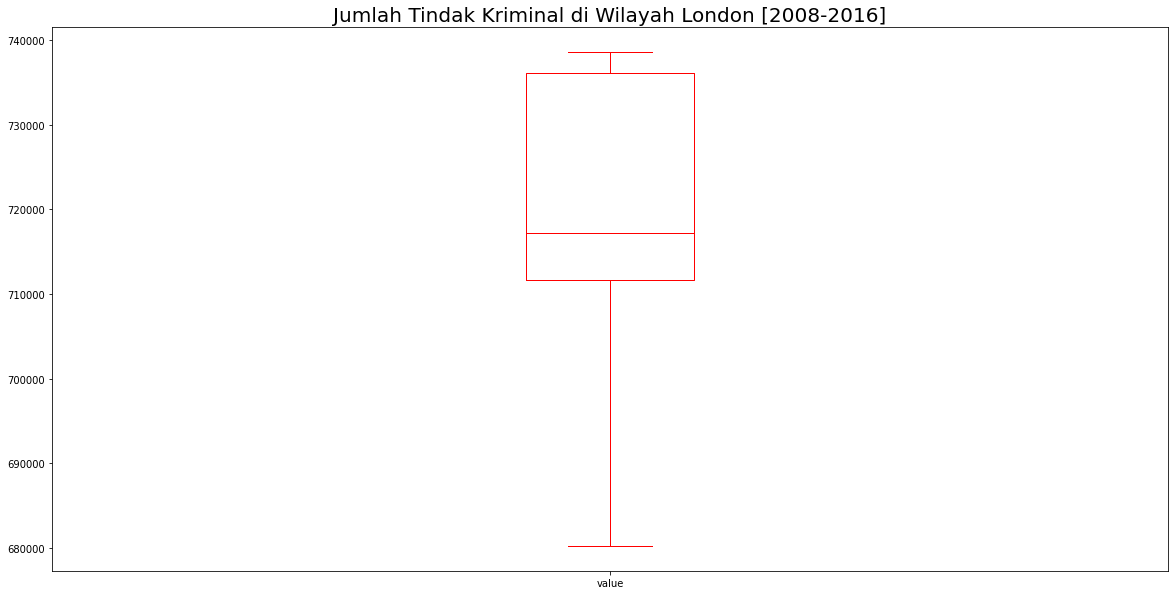

In [28]:
# inisiasi box plot
df_total.plot(kind="box",
                figsize=(20,10),
                color = "red"
                )

# membuat nama judul box plot
plt.title("Jumlah Tindak Kriminal di Wilayah London [2008-2016]", fontsize=20)

#menampilkan box plot
plt.show()

Menurut hasil diatas, dapat disimpulkan :
Jumlah Tindak Kriminal di Wilayah London [2018 - 2016] 
- Minimum = 680.183
- Kuartil Satu = 711.624
- Kuartil Dua = 717.214
- Kuartil Tiga = 736.121
- Maximum = 738.641


## Scatter Plot
---
Scatter plot adalah metode yang berguna untuk membandingkan variabel satu sama lain.

6. Pertanyaan : Pada bulan apa jumlah tindak kriminal di London mencapai angka tertinggi pada tahun 2015?

In [29]:
# menghapus kolom yang tidak diperlukan
kol4 = ["borough","major_category","minor_category"]
df_month = df_london.drop(kol4, axis=1).set_index("year")

df_month = df_month.loc[2015]

df_month = df_month.reset_index().drop("year", axis=1)
df_month = df_month.groupby("month").sum()
df_month = df_month.reset_index()

df_month

,month,value
0,1,57055
1,2,53316
2,3,60096
3,4,56445
4,5,61038
5,6,60760
6,7,61606
7,8,58056
8,9,57564
9,10,62361


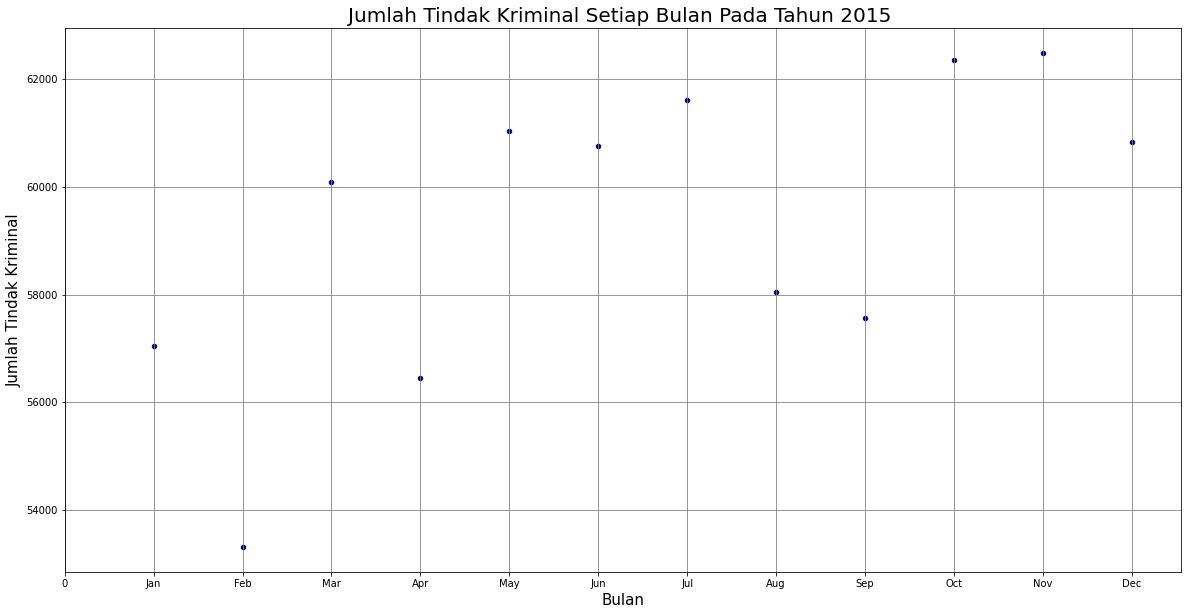

In [30]:
# inisiasi scatter plot
months = np.arange(len(df_month["month"])+1)
name_of_months=[0,'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df_month.plot(kind="scatter", 
              x="month",
              y="value",
              figsize=(20,10), 
              color="darkblue")

# membuat nama judul scatter plot
plt.title("Jumlah Tindak Kriminal Setiap Bulan Pada Tahun 2015 ", fontsize=20)
# membuat nama xlabel
plt.xlabel("Bulan", fontsize=15)
# membuat nama ylabel
plt.ylabel("Jumlah Tindak Kriminal", fontsize=15)
# menampilkan nama bulan
plt.xticks(months, name_of_months)
# menampilkan grid
plt.grid(color="grey")
# menampilkan scatter plot
plt.show()

Dari hasil diatas, dapat disimpulkan sebagai berikut:
Jumlah Tindak Kriminal Setiap Bulan di tahun 2015
- Di bulan November merupakan jumlah tindak kriminal tertinggi sebanyak 62.487
- Di bulan October merupakan jumlah tindak kriminal tertinggi kedua sebanyak 62.361
- Di bulan Februari merupakan jumlah tindak kriminal terendah sebanyak 53.316
- Di bulan April merupakan jumlah tindak kriminal terendah kedua sebanyak 56.445

## Word Clouds
---
Word clouds semakin banyak kata tertentu mundul dalam sumber data tekstual, semakin besar dan tebal kata itu muncul di kata cloud

7. Pertanyaan : Wilayah mana yang tindak kriminalnya di major_category yang paling sering terjadi pada tahun 2008 - 2016 ?

In [31]:
df_maj = pd.DataFrame(df_london, columns = ['borough', 'major_category','year','value'])
df_maj.head()

,borough,major_category,year,value
0,Sutton,Theft and Handling,2016,1
1,Barking and Dagenham,Theft and Handling,2009,1
2,Ealing,Theft and Handling,2012,2
3,Hackney,Violence Against the Person,2013,1
4,Bromley,Criminal Damage,2016,1


In [32]:
df_major1 =df_maj[['borough', 'value']].groupby(['borough'], as_index= True).sum()
df_major1.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [33]:
total =df_maj['value'].sum()
total

6447758

In [37]:
# inisiasi wordcloud
max_words = 100
word_string = ''
for borough in df_major1.index.values:
    # memeriksa apakah nama negara adalah nama satu kata
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_major1.loc[borough,'value']/float(total)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)
                                     
# menampilkan teks yang dihasilkan
word_string
# membuat wordcloud
wordcloud = WordCloud(background_color='white').generate(word_string)

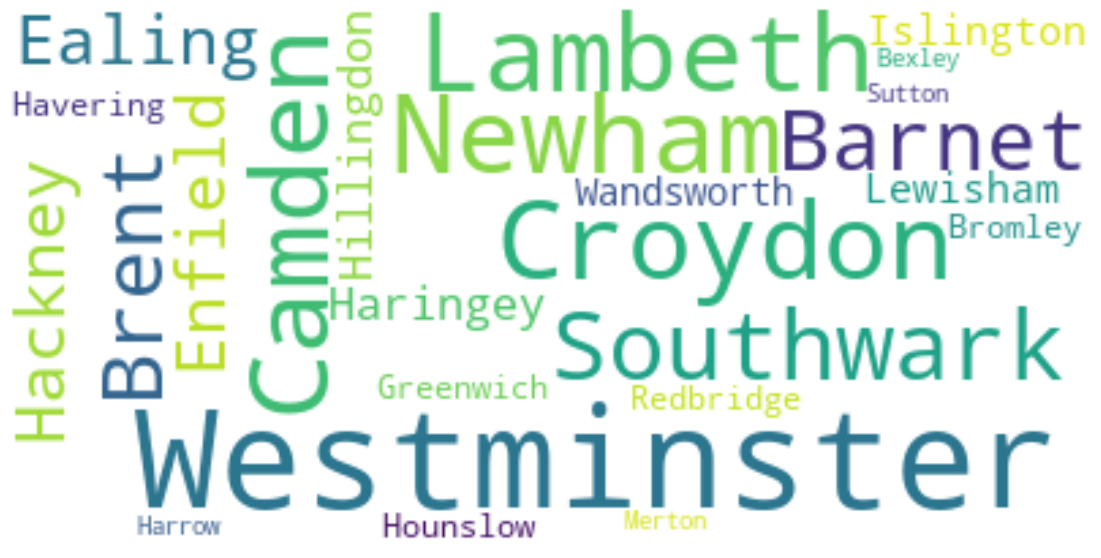

In [35]:
# menampilkan
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari hasil diatas dapat disimpulkan sebagai berikut:
1. Wilayah Westminster menjadi tempat tindak kriminal yang paling banyak
2. Wilayah kedua Lambeth menjadi tempat tindak kriminal yang paling banyak
3. Wilayah ketiga Southwark menjadi tempat tindak kriminal yang paling banyak

# KESIMPULAN
- Terdapat 3 wilayah yang memiliki tindak kriminal tinggi yaitu : Westminer, Southwark, dan Lambeth
- Wilayah Westminer dengan perolehan persentase sebanyak 16,5%
- Wilayah Westminster menjadi wilayah yang memiliki tindak kriminal terbanyak sepanjang tahun 2008 - 2016
- Wilayah City of London menjadi wilayah yang memiliki tindak kriminal terendah sepanjang tahun 2008 - 2006
- Sebanyak 13 wilayah memiliki frekuensi jumlah tindak kriminal antara 182.479 - 227.904
- Tahun 2015 di bulan November merupakan jumlah tindak kriminal tertinggi sebanyak 62.487


In [40]:
kol = ["borough","minor_category","month"]
df_maj12 = df_london.drop(kol, axis=1)
df_maj12 = pd.DataFrame(df_london, columns = ['major_category','year','value'])
df_maj.head()

,borough,major_category,year,value
0,Sutton,Theft and Handling,2016,1
1,Barking and Dagenham,Theft and Handling,2009,1
2,Ealing,Theft and Handling,2012,2
3,Hackney,Violence Against the Person,2013,1
4,Bromley,Criminal Damage,2016,1


In [63]:
df_major12 =df_maj12[['major_category', 'value']].groupby(['major_category'], as_index= True).sum()
df_major12.head(10)

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


In [42]:
total =df_maj12['value'].sum()
total

6447758

In [61]:
# inisiasi wordcloud
max_words = 5000
word_string = ''
for major_category in df_major12.index.values:
    # memeriksa apakah nama negara adalah nama satu kata
    if len(major_category.split(' ')) == 1:
        repeat_num_times = int(df_major12.loc[major_category,'value']/float(total)*max_words)
        word_string = word_string + ((major_category+ ' ') * repeat_num_times)
                                     
# membuat wordcloud
wordcloud = WordCloud(background_color='white').generate(word_string)

In [60]:
word_string

'Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary 

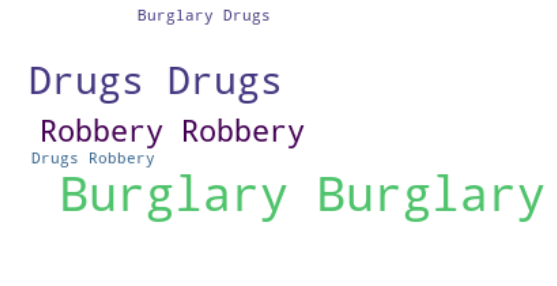

In [64]:
# menampilkan
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show(major_category)

In [66]:
df_london["Word"] = df_london["major_category"] + df_london["minor_category"]
df_london.head()

,borough,major_category,minor_category,value,year,month,Word
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,Theft and HandlingTheft/Taking of Pedal Cycle
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,Theft and HandlingOther Theft Person
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1,Theft and HandlingOther Theft Person
3,Hackney,Violence Against the Person,Harassment,1,2013,2,Violence Against the PersonHarassment
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,Criminal DamageCriminal Damage To Motor Vehicle


In [67]:
stopwords = set(STOPWORDS)
df_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords= stopwords
)

In [69]:
words = " ".join(word for word in df_london[df_london['borough']=='Westminster'].Word)
df_wc.generate(words)

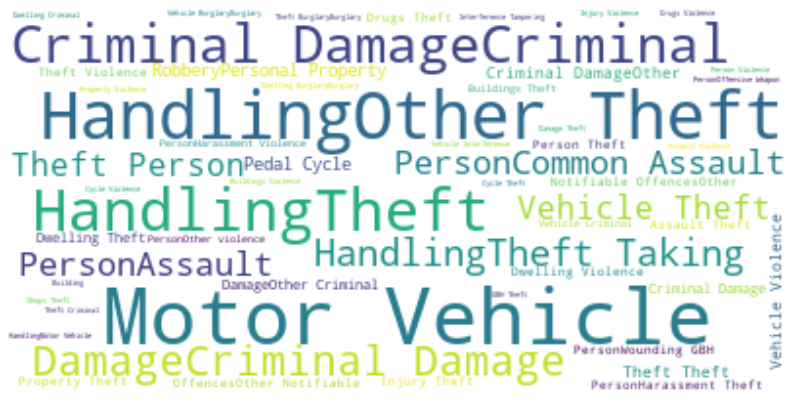

In [70]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 


plt.imshow(df_wc, interpolation='bilinear')
plt.axis('off')
plt.show()